<a href="https://colab.research.google.com/github/chrissaba3/COVID-19-NN/blob/main/Covid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import io
import pandas as pd
from google.colab import drive
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

uploaded = files.upload()
drive.mount('/content/drive')





Saving covid_formated_final.csv to covid_formated_final (1).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
original = pd.read_csv(io.BytesIO(uploaded['covid_formated_final.csv']))
print(original)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...   97       97             1         0
1      1009bf    2   24         97  ...   97       97             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...   97       97             1         0
10760  08220d    1   29          2  ...   97       97             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...   97       97             1         0
10763  018bca    1   39          2  ...   97       97             1         0

[10764 rows x 19 columns]


In [31]:
copy = original.copy()
print(copy)

for i in range(len(copy['intubed'])):
 if copy['intubed'][i] == 97:
   copy.loc[i,'intubed'] = 0


print(copy)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...   97       97             1         0
1      1009bf    2   24         97  ...   97       97             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...   97       97             1         0
10760  08220d    1   29          2  ...   97       97             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...   97       97             1         0
10763  018bca    1   39          2  ...   97       97             1         0

[10764 rows x 19 columns]
           id  sex  age  pregnancy  .

In [32]:
for i in range(len(copy['icu'])):
 if copy['icu'][i] == 97:
   copy.loc[i,'icu'] = 0

print(copy)

           id  sex  age  pregnancy  ...  icu  intubed  patient_type  deceased
0      16169f    2   27         97  ...    0        0             1         0
1      1009bf    2   24         97  ...    0        0             1         0
2      167386    1   54          2  ...    2        2             2         0
3      0b5948    2   30         97  ...    2        2             2         0
4      0d01b5    1   60          2  ...    2        2             2         1
...       ...  ...  ...        ...  ...  ...      ...           ...       ...
10759  0058c2    1   38          2  ...    0        0             1         0
10760  08220d    1   29          2  ...    0        0             1         0
10761  01e599    2   38         97  ...    1        1             2         1
10762  0bde20    1   47          2  ...    0        0             1         0
10763  018bca    1   39          2  ...    0        0             1         0

[10764 rows x 19 columns]


In [33]:
X = copy.iloc[:5000,1:15].copy()
for i in range(len(X['pregnancy'])):
 if X['pregnancy'][i] == 97:
   X.loc[i,'pregnancy'] = 0


print(X)


      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
0       2   27          0         2  ...        2              2        2          2
1       2   24          0         2  ...        2              2        2          2
2       1   54          2         2  ...        1              2        2          2
3       2   30          0         2  ...        2              2        2          1
4       1   60          2         1  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4995    2   62          0         2  ...        2              2        2          2
4996    2   30          0         2  ...        2              2        2          2
4997    1   55          2         1  ...        1              2        2          2
4998    2   73          0         2  ...        2              2        2          1
4999    2   76          0         2  ...        2              2 

In [34]:
Y =  copy.iloc[:5000,-1:]
print(Y)

      deceased
0            0
1            0
2            0
3            0
4            1
...        ...
4995         0
4996         0
4997         0
4998         1
4999         0

[5000 rows x 1 columns]


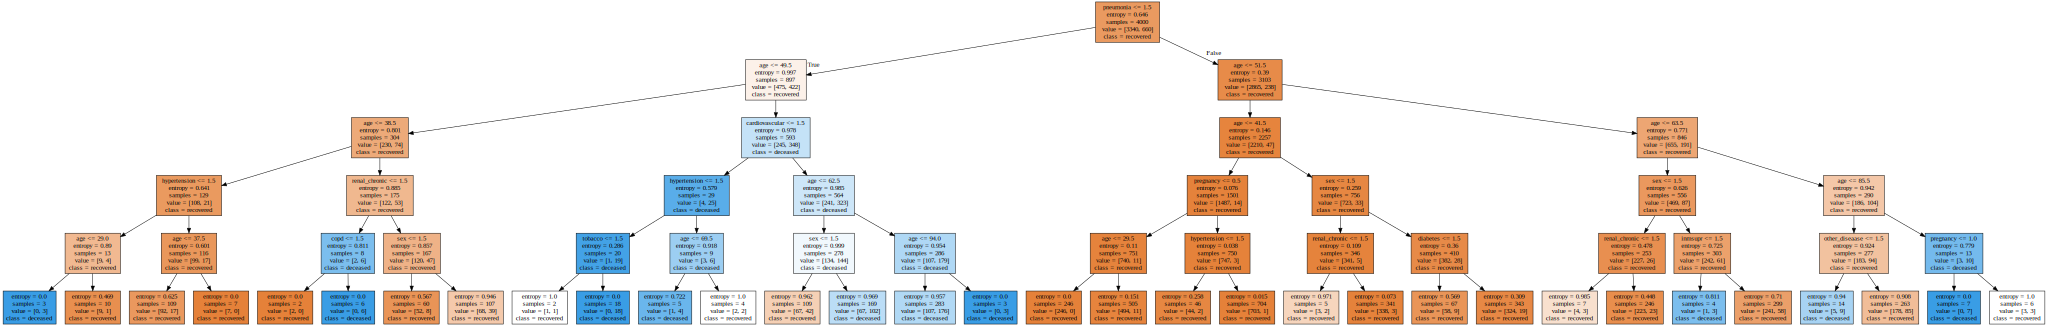

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_classifier_entropy.fit(X_train,y_train)



export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [53]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)

0.853

In [37]:
print(X_train)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
4227    1   57          2         2  ...        1              2        1          1
4676    2   32          0         2  ...        1              2        2          2
800     1   59          2         1  ...        2              2        2          2
3671    2   90          0         1  ...        2              2        2          1
4193    1   65          2         2  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4426    1   36          2         2  ...        2              2        2          2
466     1   40          2         1  ...        1              2        2          2
3092    1   39          2         2  ...        1              2        2          2
3772    2   45          0         2  ...        1              2        2          1
860     1   49          2         2  ...        2              2 

In [39]:
classification_data = copy.copy()

classification_data['classes'] = classification_data['deceased']

print(classification_data)

           id  sex  age  pregnancy  ...  intubed  patient_type  deceased  classes
0      16169f    2   27         97  ...        0             1         0        0
1      1009bf    2   24         97  ...        0             1         0        0
2      167386    1   54          2  ...        2             2         0        0
3      0b5948    2   30         97  ...        2             2         0        0
4      0d01b5    1   60          2  ...        2             2         1        1
...       ...  ...  ...        ...  ...      ...           ...       ...      ...
10759  0058c2    1   38          2  ...        0             1         0        0
10760  08220d    1   29          2  ...        0             1         0        0
10761  01e599    2   38         97  ...        1             2         1        1
10762  0bde20    1   47          2  ...        0             1         0        0
10763  018bca    1   39          2  ...        0             1         0        0

[10764 rows x 2

In [40]:
for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 1:
   classification_data.loc[i,'classes'] = 'deceased'


for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 0:
   classification_data.loc[i,'classes'] = 'recovered'
print(classification_data)



           id  sex  age  pregnancy  ...  intubed  patient_type  deceased    classes
0      16169f    2   27         97  ...        0             1         0  recovered
1      1009bf    2   24         97  ...        0             1         0  recovered
2      167386    1   54          2  ...        2             2         0  recovered
3      0b5948    2   30         97  ...        2             2         0  recovered
4      0d01b5    1   60          2  ...        2             2         1   deceased
...       ...  ...  ...        ...  ...      ...           ...       ...        ...
10759  0058c2    1   38          2  ...        0             1         0  recovered
10760  08220d    1   29          2  ...        0             1         0  recovered
10761  01e599    2   38         97  ...        1             2         1   deceased
10762  0bde20    1   47          2  ...        0             1         0  recovered
10763  018bca    1   39          2  ...        0             1         0  re

In [41]:
X_classification = classification_data.iloc[:5000,1:15].copy()

print(X_classification)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
0       2   27         97         2  ...        2              2        2          2
1       2   24         97         2  ...        2              2        2          2
2       1   54          2         2  ...        1              2        2          2
3       2   30         97         2  ...        2              2        2          1
4       1   60          2         1  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4995    2   62         97         2  ...        2              2        2          2
4996    2   30         97         2  ...        2              2        2          2
4997    1   55          2         1  ...        1              2        2          2
4998    2   73         97         2  ...        2              2        2          1
4999    2   76         97         2  ...        2              2 

In [42]:
Y_classes =  classification_data.iloc[:5000,-1:]

print(Y_classes)

        classes
0     recovered
1     recovered
2     recovered
3     recovered
4      deceased
...         ...
4995  recovered
4996  recovered
4997  recovered
4998   deceased
4999  recovered

[5000 rows x 1 columns]


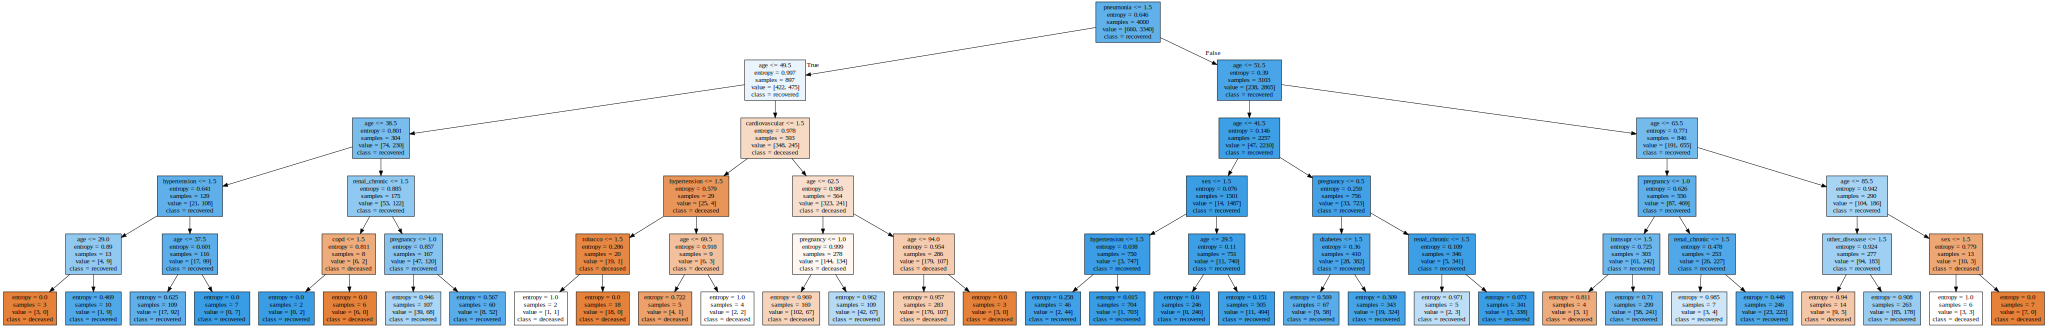

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_train_,X_test,y_train,y_test = train_test_split(X_classification, Y_classes, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_classifier_entropy.fit(X_train,y_train)



export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['deceased','recovered'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [50]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)

0.853

In [11]:
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, 
                              verbose=1, cv
grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

SyntaxError: ignored

In [51]:
from sklearn.base import clone
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode
import numpy as np

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size = len(X_train) - n_instances, 
                  random_state=42)

for mini_train_index,mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train,y_mini_train))

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train,y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
  
Y_pred = np.empty([n_trees,len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
  Y_pred[tree_index] =  tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

KeyError: ignored

In [94]:
export_graphviz(grid_search_cv ,out_file=("covid_tree_grid_Search.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_grid_Search.dot")

AttributeError: ignored